# djAnagular Data Science gender

# Get the Dataset

In [226]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [227]:
# Read in data into a dataframe
df = pd.read_csv('customerGender.csv');

# Questions

What are the characteristics or traits of objects in the dataset? 
Are there any correlations?
How do they correlate to other traits or objects? 
Which are the dependant variables? 
Which are the independant variables?

# Observations 

In [228]:
# "A primarily label-location based indexer"
df = df.iloc[:,:]
# Show the first 5 (or 10) rows of the table
df.head(200)

,ID,Name,Age,Active,Unnamed: 4
0,7,Rebecca,25,False,NaN
1,8,Sarah,23,False,NaN
2,9,Abagail,24,False,NaN
3,4,Wes,23,True,NaN
4,3,Julia,22,False,NaN
5,2,Olivia,23,False,NaN
6,10,Chris,42,True,NaN
7,11,Matt,36,True,NaN
8,12,Braynt,38,True,NaN
9,13,Brianh,34,True,NaN


The columns of the customer dataset include Name, Age, Active(Gender)
The characteristics of the dataset show no obvious correlation unless you would know the person. 
Although, two columns are nouns and two columns are adjectives.  
Each column seems independant. 
Each column does not depend on other columns for a value. 
However, one can determine gender just by looking at the Name of the object, i.e., Rebecca is a female.
Overall, there are not enough columns in this dataset to find any significant correlations. 

# Exploratory Analysis and Data Cleaning

Out of this group of people, what percentage is male? What percentage is female?

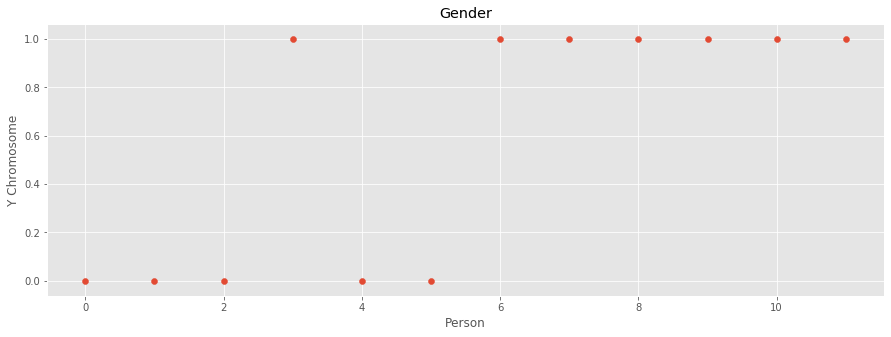

In [229]:
# ***  Cursory plot
plt.figure(figsize = (15, 5))
plt.scatter(x = df['Name'].index, y = df['Active'])
# plt.plot(kind = "scatter", x = df['LandAverageTemperature'].index, y = df['LandAverageTemperature'])
plt.title("Gender")
plt.xlabel("Person")
plt.ylabel("Y Chromosome")
plt.show()

In [45]:
# Count all the males
males = df['Active'] == True
grouped = df.groupby(males).count()
grouped

,ID,Name,Age,Active,Unnamed: 4
Active,,,,,
False,5,5,5,5,0
True,7,7,7,7,0


In [46]:
grouped.apply(lambda x: x/x.sum())

,ID,Name,Age,Active,Unnamed: 4
Active,,,,,
False,0.416667,0.416667,0.416667,0.416667,NaN
True,0.583333,0.583333,0.583333,0.583333,NaN


7 Male - 58%, 5 Female - 42%


What is the percentage of those still in their 20's? 

In [138]:
roaring20s = df['Age'] < 30
maleOnly = df['Active'] == True
group20s = df.groupby(roaring20s).count()
group20s

,ID,Name,Age,Active,Unnamed: 4
Age,,,,,
False,5,5,5,5,0
True,7,7,7,7,0


In [112]:
group20s.apply(lambda x: x/x.sum())

,ID,Name,Age,Active,Unnamed: 4
Age,,,,,
False,0.416667,0.416667,0.416667,0.416667,NaN
True,0.583333,0.583333,0.583333,0.583333,NaN


7 Under 30 - 58%, 5 30 and up - 42%

100% of the females are under 20. 
What percentage of males are under 30?

In [159]:
males20 = df.groupby(['Age','Active']).count()
males20

,,Name,Age,Unnamed: 4
ID,Active,,,
2,False,1,1,0
3,False,1,1,0
4,True,1,1,0
6,True,1,1,0
7,False,1,1,0
8,False,1,1,0
9,False,1,1,0
10,True,1,1,0
11,True,1,1,0


In [ ]:
males20 = df.groupby(['Age','Active']).count()
males20

1 male and 1 female are 23

In [134]:
males20.apply(lambda x: x/x.sum())

ID      Name  Unnamed: 4
Age Active                                
22  False   0.083333  0.083333         NaN
23  False   0.166667  0.166667         NaN
    True    0.083333  0.083333         NaN
24  False   0.083333  0.083333         NaN
25  False   0.083333  0.083333         NaN
26  True    0.083333  0.083333         NaN
34  True    0.083333  0.083333         NaN
36  True    0.083333  0.083333         NaN
38  True    0.083333  0.083333         NaN
42  True    0.083333  0.083333         NaN
48  True    0.083333  0.083333         NaN

In [140]:
maleAnd20s = df.groupby([roaring20s, maleOnly]).count()
maleAnd20s

ID  Name  Age  Active  Unnamed: 4
Age   Active                                   
False True     5     5    5       5           0
True  False    5     5    5       5           0
      True     2     2    2       2           0

5 males 30 and up, 5 females (all in their 20s), 2 males under 30

In [142]:
maleAnd20s.apply(lambda x: x/x.sum())

ID      Name       Age    Active  Unnamed: 4
Age   Active                                                    
False True    0.416667  0.416667  0.416667  0.416667         NaN
True  False   0.416667  0.416667  0.416667  0.416667         NaN
      True    0.166667  0.166667  0.166667  0.166667         NaN

42% are Males 30 and Over, 42% are female (all in their 20s), 17% are males under 30

What is the average age of this group? 

In [230]:
# df.describe()
df = df.iloc[:,:]
df.mean()

ID             8.250000
Age           30.333333
Active         0.583333
Unnamed: 4          NaN
dtype: float64

Who is the youngest person of the group? Who is the oldest?

In [231]:
df = df.iloc[:,:4]
df.describe()

,ID,Age
count,12.000000,12.000000
mean,8.250000,30.333333
std,3.957157,8.896714
min,2.000000,22.000000
25%,5.500000,23.000000
50%,8.500000,25.500000
75%,11.250000,36.500000
max,14.000000,48.000000


Check datatypes for each column in the dataset

In [232]:
#check datatypes 
print(type(df['Name'][0]))

<class 'str'>


In [182]:
#check datatypes 
print(type(df['ID'][0])) 

<class 'numpy.int64'>


In [183]:
print(type(df['Age'][0]))

<class 'numpy.int64'>


In [184]:
#check datatypes 
print(type(df['Active'][0]))

<class 'numpy.bool_'>


In [25]:
# # *** HOW TO Convert to datetime object
# INSERT_VARIABLE = pd.DatetimeIndex(df['INSERT_COLUMN'])

# # *** HOW TO Group by INSERT_COLUMN
# grouped = df.groupby([INSERT_VARIABLE.year]).mean()

What is the average age and gender of the group?

<Figure size 1080x360 with 0 Axes>

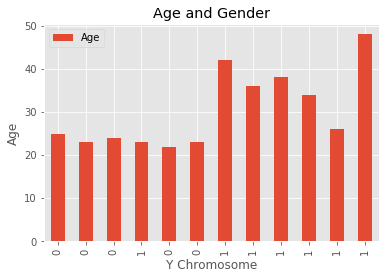

In [254]:
# Plot
plt.figure(figsize = (15, 5))

# plt.plot(x = ages, y = genders, style='o')
# df.plot(x='Age', y='Active', style='o')
df.plot(x="Active", y="Age", kind="bar")
# Change features of the graph
plt.title("Age and Gender")
plt.xlabel("Y Chromosome")
plt.ylabel("Age")
# plt.Legend(x = 'b', y = 'r')
plt.show()

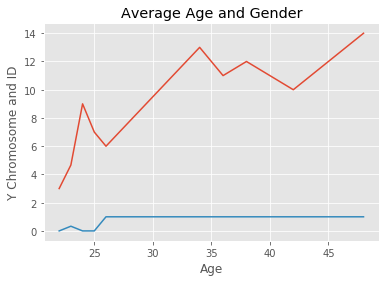

In [253]:
ages = df['Age']
genders = df['Active']
# males20 = df.groupby(['Active','ID']).mean()
grouped = df.groupby(ages).mean()

plt.plot(grouped)
# Change features of the graph
plt.title("Average Age and Gender")
plt.xlabel("Age")
plt.ylabel("Y Chromosome and ID")
# plt.Legend(x = 'b', y = 'r')
plt.show()

According to the model, the average description of this group seems to be a male in his 30s. Let's look for any anomalies, clean date and make a more precise analysis to confirm this observation. 

In [246]:
# *** Any anomalies?
# Can't get the average of gender due to datatype of gender column labeled 'Active'
print(type(df['Active'][0]))
df.describe()

<class 'numpy.bool_'>


,ID,Age
count,12.000000,12.000000
mean,8.250000,30.333333
std,3.957157,8.896714
min,2.000000,22.000000
25%,5.500000,23.000000
50%,8.500000,25.500000
75%,11.250000,36.500000
max,14.000000,48.000000


In [245]:
# Check datatype.
print(type(df['Active'][0]))

<class 'numpy.bool_'>


Active is not showing any stats. Could be because of datatype. Lets change it. 

In [252]:
#Change bool to int
df['Active'] = df['Active'].astype(int)
# grab stats
df.describe()

,ID,Age,Active
count,12.000000,12.000000,12.000000
mean,8.250000,30.333333,0.583333
std,3.957157,8.896714,0.514929
min,2.000000,22.000000,0.000000
25%,5.500000,23.000000,0.000000
50%,8.500000,25.500000,1.000000
75%,11.250000,36.500000,1.000000
max,14.000000,48.000000,1.000000


Looks like the data is leaning more in favor of male being the average gender of the group

<h2>Conclusion</h2>

The average age of this group is about 30 and 4 months. 
The youngest is 22 - that person is number 4  or ID number 3 and her name is Julia. 
The oldest is 48 - that person is number 11 or ID number 14 and his name is Ernest. 

There are 7 people total that are Under 30 - thats 58% who are still in their 20s. 
There are 5 people who are 30 and up - 42% who are not in their 20s.
What's noteable is 1 male and 1 female are 23 years of age.
There is a percentage of 42% that are Males who are age 30 and Over. 
There is a percentage of 42% that are female. 
What's also noteworthy is all the females are in their 20s. 
There is a percentage of 17% that are males in their 20s. 
We can also conclude that the average gender and age of the group is a male in his 30s.

The columns of the customer dataset include Name, Age, Active(Gender)
The characteristics of the dataset show no obvious correlation unless you would know the person. 
Although, two columns are nouns and two columns are adjectives.  
Each column seems independant. 
Each column does not depend on other columns for a value. 
However, one can determine gender just by looking at the Name of the object, i.e., Rebecca is a female.
Overall, there are not enough columns in this dataset to find any significant correlations. 